In [3]:
import numpy as np
import pickle
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd 
import pickle

np.random.seed(0)

In [4]:
data = pd.read_table('../data/data_nam.txt', sep=' ',header=0)

In [5]:
data.head()

,IndivID,PopID,Pop,Country,Continent,sex,lat,long,L1.125,L1.130,...,L677.255.553287981859,L677.259,L677.263,L677.267,L678.202,L678.206,L678.209.848101265823,L678.210,L678.214,L678.218
Chipewyan29,2012,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,0,1,0,0
Chipewyan31,2156,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,1,0,0,0
Chipewyan33,2381,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,1,0,0,0,0
Chipewyan35,2382,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,0,1,0,0
Chipewyan37,2383,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,1,0,0,0,0,0,1,0,0




$
\begin{pmatrix}
    A \\
\end{pmatrix}
$

# Analysis

Names of the different populations.

In [6]:
print('Names of the different populations:\n', np.unique(data['Pop']), '\n')
print('Number of populations: ', len(np.unique(data['Pop'])))

Names of the different populations:
 ['Ache' 'Arhuaco' 'Aymara' 'Cabecar' 'Chipewyan' 'Cree' 'Embera' 'Guarani'
 'Guaymi' 'Huilliche' 'Inga' 'Kaingang' 'Kaqchikel' 'Karitiana' 'Kogi'
 'Maya' 'Mixe' 'Mixtec' 'Ojibwa' 'Piapoco' 'Pima' 'Quechua' 'Surui'
 'TicunaArara' 'Waunana' 'Wayuu' 'Zapotec'] 

Number of populations:  27


In [7]:
print('Coordinates of the different populations:\n')
data[['Pop', 'long', 'lat']].set_index('Pop').drop_duplicates()

Coordinates of the different populations:



,long,lat
Pop,,
Chipewyan,-107.3,59.55
Cree,-102.5,50.33
Ojibwa,-81.0,46.50
Kaqchikel,-91.0,15.00
Mixtec,-97.0,17.00
Mixe,-96.0,17.00
Zapotec,-97.0,16.00
Guaymi,-82.0,8.50
Cabecar,-84.0,9.50


## PCA and Regression : Data

In [8]:
data_aux = data.copy()
data_aux = data_aux.drop(data.columns[0:6], axis=1)
x = data_aux.drop(data_aux.columns[0:2], axis=1).values
y_long = data['long'].values
y_lat = data['lat'].values

In [9]:
# Save data.
# pickle.dump(x, open('../data/data_nam_clean.matrix', 'wb'), -1)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(100).fit(x)
comp = pca.transform(x)

In [11]:
from sklearn.linear_model import LinearRegression

reg_long = LinearRegression()
reg_lat = LinearRegression()

reg_long.fit(comp, y_long)
reg_lat.fit(comp, y_lat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
x_long = reg_long.predict(comp)
x_lat = reg_lat.predict(comp)

## PCA and Regression : Generated Data

In [28]:
import matplotlib.pyplot as plt 

x_gen = np.load('../generated/synthetic_data_nam.npy')

In [29]:
x_gen = np.round(x_gen)

In [30]:
from sklearn.decomposition import PCA

#pca_gen = PCA(100).fit(x_gen)
comp_gen = pca.transform(x_gen)

In [31]:
x_gen_long = reg_long.predict(comp_gen)
x_gen_lat = reg_lat.predict(comp_gen)

# Comparison

In [26]:
def get_dw_proba(x, x_gen):
    x_avg = np.sum(x, 0) / x.shape[0]
    x_gen_avg = np.sum(x_gen, 0) / x_gen.shape[0]
    plt.scatter(x_avg, x_gen_avg, s=10, zorder=10)
    lims = [0, .5]
    plt.xlim(lims)
    plt.ylim(lims)
    plt.plot(lims, lims, 'k-', alpha=0.5, zorder=0)
    plt.xlabel("Original Data")
    plt.ylabel("Synthetic Data")
    plt.title("Dimension-wise Probability")
    plt.show()

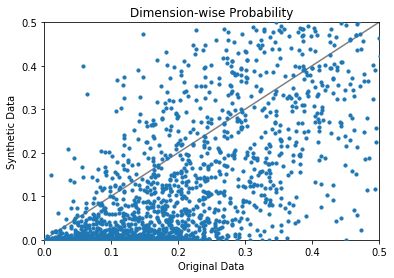

In [27]:
get_dw_proba(x, x_gen)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

ax[0].scatter(x_long, x_lat)
ax[0].set_title('Original data coordinates of individuals')
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")

ax[1].scatter(x_gen_long, x_gen_lat)
ax[1].set_title('Generated data coordinates of individuals')
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()

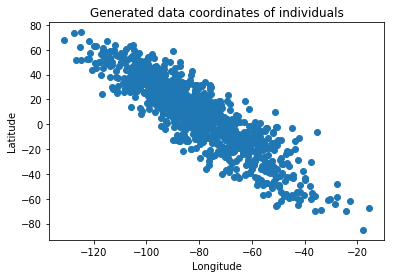

In [48]:
plt.scatter(x_gen_long, x_gen_lat )
plt.title('Generated data coordinates of individuals')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Distributions

### Normal Test

Hypothesis : X follows a Gaussian distribution.

In [35]:
from scipy.stats.mstats import normaltest

print('Longitude', normaltest(x_long))
print('Generated longitude', normaltest(x_gen_long))
print('Longitude', normaltest(x_lat))
print('Generated latitude', normaltest(x_gen_lat))

Longitude NormaltestResult(statistic=21.61247148371524, pvalue=2.0272693162775423e-05)
Generated longitude NormaltestResult(statistic=14.950848093694662, pvalue=0.00056684534768463505)
Longitude NormaltestResult(statistic=13.832003614168682, pvalue=0.00099178738123521055)
Generated latitude NormaltestResult(statistic=28.010449800020655, pvalue=8.271953951409012e-07)


### KS Test

Hypothesis : X and Y follow the same distribution.

In [36]:
from scipy.stats import ks_2samp

print('KS Test on longitude', ks_2samp(x_long, x_gen_long))
print('KS Test on latitude' , ks_2samp(x_lat, x_gen_lat))

KS Test on longitude Ks_2sampResult(statistic=0.095659919028340035, pvalue=0.0043282698261905683)
KS Test on latitude Ks_2sampResult(statistic=0.15181781376518222, pvalue=3.8839306593676873e-07)


Since p-values are really low on both KS test, we can reject the hypothesis.

Either we need to draw more data or train on more epochs but results are not satisfying here.

Fitting a gaussian to the longitude.

In [16]:
from scipy.stats import norm 

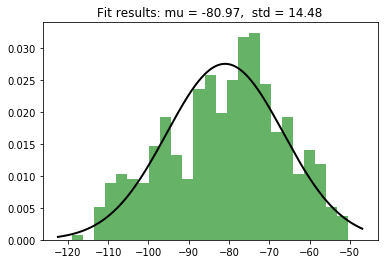

In [19]:
plt.hist(x_long,  bins=25, normed=True, alpha=0.6, color='g')

mu_long, std_long = norm.fit(x_long)
xmin_long, xmax_long = plt.xlim()
vec_long = np.linspace(xmin_long, xmax_long, len(x_long))
p_long = norm.pdf(vec_long, mu_long, std_long)
plt.plot(vec_long, p_long, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_long, std_long)
plt.title(title)
plt.show()

Fitting the same gaussian to the generated longitude.

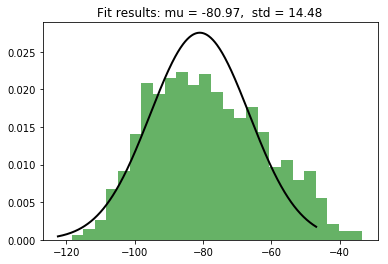

In [20]:
plt.hist(x_gen_long, bins=25, normed=True, alpha=0.6, color='g')

plt.plot(vec_long, p_long, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_long, std_long)
plt.title(title)
plt.show()

Fitting a gaussian to the latitude.

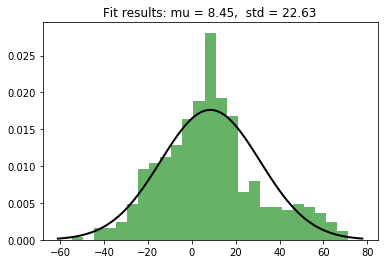

In [39]:
plt.hist(x_lat,  bins=25, normed=True, alpha=0.6, color='g')

mu_lat, std_lat = norm.fit(x_lat)
xmin_lat, xmax_lat = plt.xlim()
vec_lat = np.linspace(xmin_lat, xmax_lat, 100)
p_lat = norm.pdf(vec_lat, mu_lat, std_lat)
plt.plot(vec_lat, p_lat, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_lat, std_lat)
plt.title(title)
plt.show()

Fitting the same gaussian to the generated latitude.

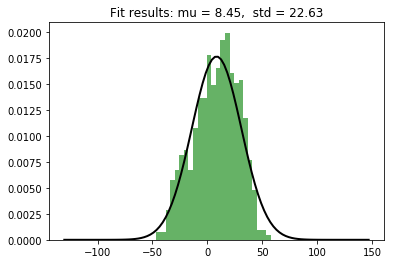

In [23]:
plt.hist(x_gen_lat,bins=25, normed=True, alpha=0.6, color='g')

plt.plot(vec_lat, p_lat, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_lat, std_lat)
plt.title(title)
plt.show()

In [24]:
def get_reg(path):
    x_gen = np.round(np.load(path))
    #pca_gen = PCA(100).fit(x_gen)
    comp_gen = pca.transform(x_gen)
    x_gen_long = reg_long.predict(comp_gen)
    x_gen_lat = reg_lat.predict(comp_gen)
    return x_gen_long, x_gen_lat

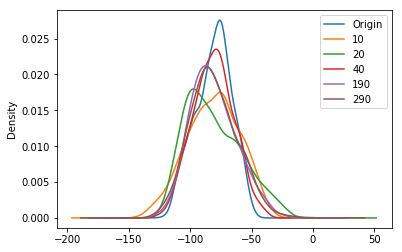

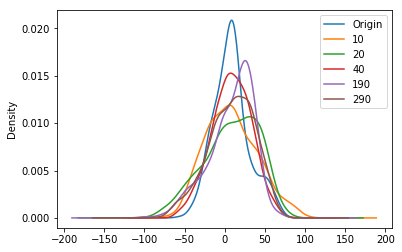

In [34]:
import glob

fig_long, ax_long = plt.subplots()
fig_lat, ax_lat = plt.subplots()
pd.DataFrame({'Origin':x_long}).plot(kind='density', ax=ax_long)
pd.DataFrame({'Origin':x_lat}).plot(kind='density', ax=ax_lat)

files = glob.glob("../generated/synthetic_data_nam_*.npy")
indices = list()
for file in files:
    indices.append(int(file.split('.npy')[0].split('_')[-1]))  
indices = np.sort(np.array(indices))

for index, file in zip(indices, files):
    x_gen_long, x_gen_lat = get_reg(file)
    pd.DataFrame({index:x_gen_long}).plot(kind='density', ax=ax_long)
    pd.DataFrame({index: x_gen_lat}).plot(kind='density', ax=ax_lat)
plt.legend()
plt.show()